In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error

In [ ]:
ticket ="RELIANCE.NS"
data=yf.download(ticket, period='5y', interval='1d')
data.to_csv('reliance.csv')

/tmp/ipython-input-1492618831.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticket, period='5y', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [ ]:
df=pd.read_csv('reliance.csv', header=0)
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2021-02-25,972.3152465820312,975.7839784992644,939.9629033732783,941.3232186199032,34855693
3,2021-02-26,945.7669067382812,967.576928004242,938.9200542247918,959.9139702500598,37481215
4,2021-03-01,952.9765625,957.6469350488829,935.2020292571182,956.8307097723348,17680764


In [ ]:
df=df.iloc[2:].copy()

In [ ]:
df.head()

,Price,Close,High,Low,Open,Volume
2,2021-02-25,972.3152465820312,975.7839784992644,939.9629033732783,941.3232186199032,34855693
3,2021-02-26,945.7669067382812,967.576928004242,938.9200542247918,959.9139702500598,37481215
4,2021-03-01,952.9765625,957.6469350488829,935.2020292571182,956.8307097723348,17680764
5,2021-03-02,954.9261474609375,965.8084897149365,947.263190026968,962.1810822756376,17150760
6,2021-03-03,998.5009765625,1006.572077071357,955.4703590572257,961.750393670414,31924461


In [ ]:
df.rename(columns={'Price':'Date'}, inplace=True)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
df=df[["Close"]]

In [ ]:
df.head()

,Close
Date,
2021-02-25,972.3152465820312
2021-02-26,945.7669067382812
2021-03-01,952.9765625
2021-03-02,954.9261474609375
2021-03-03,998.5009765625


In [ ]:
df['Close']=pd.to_numeric(df['Close'], errors="coerce")

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv("reliance_v2.csv")

In [ ]:
df.head()

,Close
Date,
2021-02-25,972.315247
2021-02-26,945.766907
2021-03-01,952.976562
2021-03-02,954.926147
2021-03-03,998.500977


In [ ]:
df.shape

(1237, 1)

<function matplotlib.pyplot.show(close=None, block=None)>

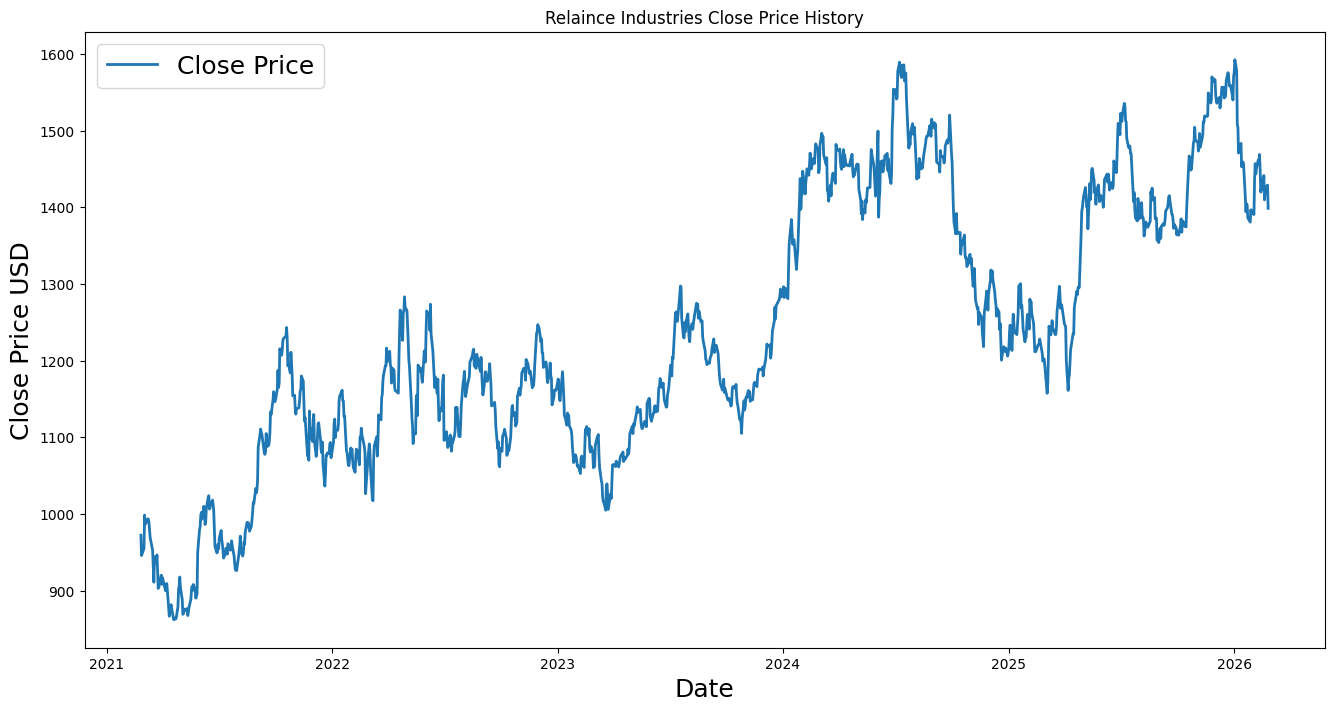

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Relaince Industries Close Price History')
plt.plot(df['Close'], label="Close Price", linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.legend(fontsize=18)
plt.show

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(df)
print(scaled_data)

[[0.15100715]
 [0.11465247]
 [0.1245252 ]
 ...
 [0.77501131]
 [0.77610688]
 [0.73461469]]


In [ ]:
def create_sequence(data, time_steps=60):
  X,Y=[],[]
  for i in range(time_steps,len(data)):
    X.append(data[i-time_steps:i,0])
    Y.append(data[i,0])
  return np.array(X), np.array(Y)
TIME_STEPS=60

X,y=create_sequence(scaled_data, TIME_STEPS)
X=X.reshape(X.shape[0], X.shape[1],1)

In [ ]:
train_size=int(len(X)*0.8)

X_train, X_test=X[:train_size], X[train_size:]
y_train, y_test=y[:train_size], y[train_size:]

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0636 - val_loss: 0.0038
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0078 - val_loss: 0.0047
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 0.0054 - val_loss: 0.0040
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0050 - val_loss: 0.0084
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0042 - val_loss: 0.0028
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - loss: 0.0041 - val_loss: 0.0027
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - loss: 0.0040 - val_loss: 0.0057
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 

In [ ]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions.reshape(-1,1))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [ ]:
Y_test_actual=scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
rmse=np.sqrt(mean_squared_error(Y_test_actual, predictions))
print("Root Mean Square Error: ",rmse)

Root Mean Square Error:  32.50427182056025


Text(0, 0.5, 'Close Price')

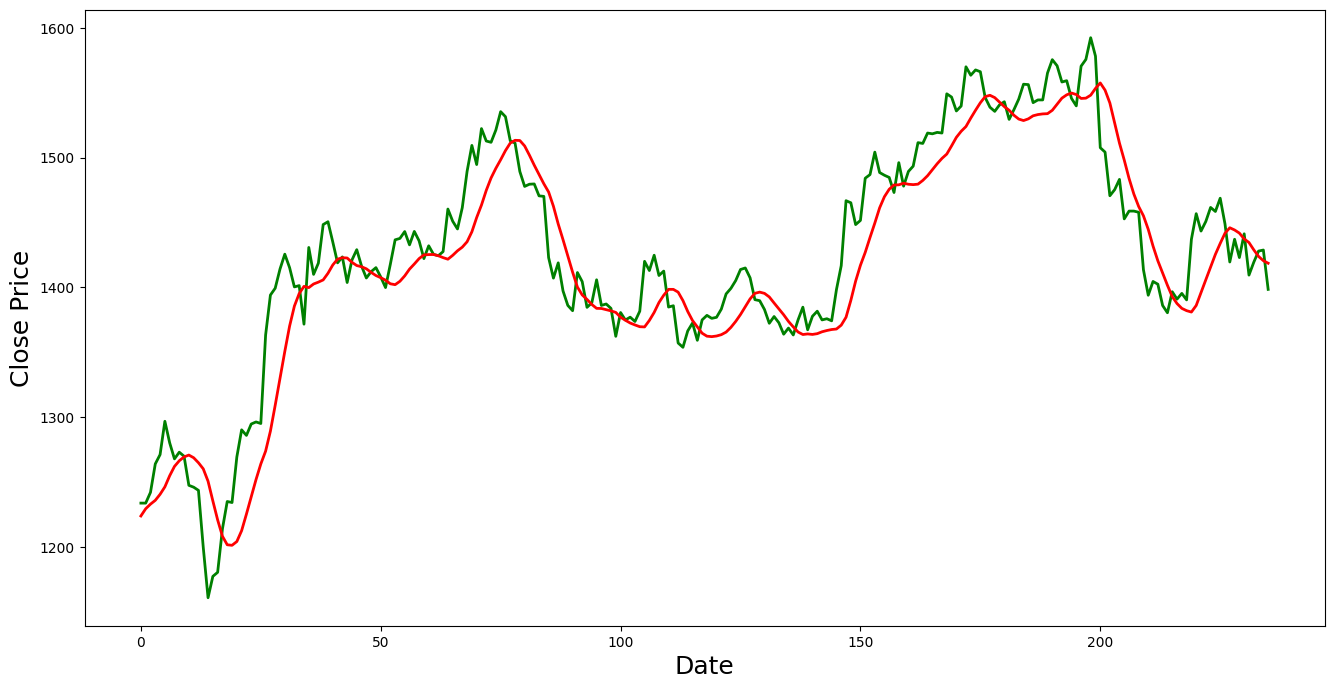

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(Y_test_actual, label="Actual Price", linewidth=2, color="green")
plt.plot(predictions, label="Predicted Price", linewidth=2, color="red")
plt.xlabel('Date', fontsize=18)
plt.ylabel("Close Price", fontsize=18)

In [ ]:
last_60_days=scaled_data[-60:]
last_60_days=last_60_days.reshape(1, TIME_STEPS, 1)
next_day_price=model.predict(last_60_days)
next_day_price=scaler.inverse_transform(next_day_price)
print("Next Day Price: ", next_day_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Next Day Price:  [[1414.0402]]


In [ ]:
# Save model
model.save("stock_lstm_model.h5")

# Save scaler
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))

print("Saved successfully")

Saved successfully
